# **ALGORITHM** SPRING 2024
## Genetic Algorithm Project Team 7
#### Presented by: 박상범(21800272), 방은주(22100331), 황은지(22100809), 구나영(22101006)

In [ ]:
!pip install haversine
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from haversine import haversine, Unit
from google.colab import files

## **Task 1: Optimize a continuous function using the genetic algorithm**

### Genetic algorithm codes

In [ ]:
# Define the main features of the genetic algorithm
# Set the objective function, boundaries of variables, initial gene population size, mutation and crossover rates, etc.
class GeneticAlgorithm:
    def __init__(self, objective, bounds, population_size=100, mutation_rate=0.01, crossover_rate=0.7, generations=100):
        self.objective = objective
        self.bounds = bounds
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.generations = generations
        self.population = self.initialize_population()
# Code to generate the initial population
# Make it randomized within the range of the variable.
    def initialize_population(self):
        return [random.uniform(self.bounds[0], self.bounds[1]) for _ in range(self.population_size)]
# Function to perform mutation
# Mutate with some probability on candidate.
    def mutate(self, candidate):
        if random.random() < self.mutation_rate:
            candidate += random.uniform(-0.1, 0.1)
            candidate = max(min(candidate, self.bounds[1]), self.bounds[0])
        return candidate
# Perform an intersection function, selecting both parents to create a new candidate.

    def crossover(self, parent1, parent2):
        if random.random() < self.crossover_rate:
            return (parent1 + parent2) / 2
        return parent1 if self.objective(parent1) < self.objective(parent2) else parent2
# Parent Selection Function
    def select_parent(self):
        return self.population[random.randint(0, self.population_size - 1)]
# Progress function for one generation
# Generate new years by applying crossover and mutation.
    def evolve(self):
        new_generation = []
        for _ in range(self.population_size):
            parent1, parent2 = self.select_parent(), self.select_parent()
            child = self.crossover(parent1, parent2)
            child = self.mutate(child)
            new_generation.append(child)
        self.population = new_generation
# Run the genetic algorithm for a given number of generations and return the optimal solution.
    def run(self):
        best_solution = None
        best_score = float('inf')

        for generation in range(self.generations):
            self.evolve()
            current_scores = [self.objective(x) for x in self.population]
            current_best_score = min(current_scores)
            if current_best_score < best_score:
                best_score = current_best_score
                best_solution = self.population[current_scores.index(best_score)]

            # Stopping criterion based on the change in the best score
            if generation > 0 and abs(previous_best_score - best_score) < 1e-6:
                break
            previous_best_score = best_score

        return best_solution, best_score

#Q.Discuss how you would choose a user-defined parameter (such as the crossover rate).
#The higher the crossover rate, the more parental individuals are crossed over to produce new offspring, resulting in the exchange of diverse genetic information and a more efficient exploration of the solution space.
#However, too high a crossover ratio can lead to a loss of diversity, so you need to choose an appropriate value.
#It is generally recommended to choose a crossover rate between 0.6 and 0.9, which is why in this code, the crossover rate is set to 0.7 to account for the diversity and convergence speed between generations

#Q. Explain how to design a stopping criterion and provide evidence for whether the optimal value has converged.
#To determine if the best value has converged, we measure the change between the best value of the previous generation and the current generation to set a stopping criterion.
#In this code, we use the previous_best_score variable to keep track of the previous best value and stop the algorithm when the difference from the current best value is below a certain threshold (a small value set to 1e-6).
#These criteria allow us to determine whether the algorithm has converged.

### Constrained Genetic Algorithm

In [ ]:
# Modify the Genetic Algorithm to include the constraint x ≤ 2
class GeneticAlgorithmConstrained(GeneticAlgorithm):
    def __init__(self, objective, constraint, bounds, population_size=100, mutation_rate=0.01, crossover_rate=0.7, generations=100):
        super().__init__(objective, bounds, population_size, mutation_rate, crossover_rate, generations)
        self.constraint = constraint
#Function to check if a candidate satisfies a constraint
    def is_feasible(self, candidate):
        return candidate <= self.constraint
#A function in GeneticAlgorithm class that adds constraints and selects only candidate solutions that satisfy them
    def evolve(self):
        new_generation = []
        for _ in range(self.population_size):
            parent1, parent2 = self.select_parent(), self.select_parent()
            child = self.crossover(parent1, parent2)
            child = self.mutate(child)
            if self.is_feasible(child):
                new_generation.append(child)
            else:
                new_generation.append(random.uniform(self.bounds[0], self.constraint))
        self.population = new_generation

#Q. Discuss how constraints were considered in the process of the genetic algorithm.
#Class GeneticAlgorithm uses the bounds parameter to define a constraint as the range of a variable.
#Inherited this from GeneticAlgorithmConstrained.
#When we create candidates in the initialize_population() function, we satisfy the constraint by making sure that the variables are created within the bounds range.
#In addition, GeneticAlgorithmConstrained uses the is_feasible() function to select candidate solutions that satisfy the constraints.
#Also, when we use the evolve() function to generate descendants, if a new descendant violates the constraints, we tell it to replace that descendant with a new random solution.
#This ensures that we only select solutions that satisfy the constraints, and thus generate candidates that satisfy the constraints.

#Q. Compare the constrained and unconstrained optima and explain why they are different.
#Simply put, this is because there is a constraint of x ≤ 2.
#However, the crossover rate and mutation rate have a greater impact on the search for a constrained optimum than the crossover rate and mutation rate.
#In the case of crossover rate, the search for a constrained optimum involves finding children that satisfy the constraints while maintaining the diversity of the solution.
#The same is true for the mutation rate, because the mutation rate requires the search for the constrained optimum to expand the search space of the solution and push it out of the local optimum.

In [ ]:
# Objective function
def objective_function(x):
    return 2*x**4 - 10*x**3 + 8*x**2 + 5*x

In [ ]:
# Unconstrained optimization
ga = GeneticAlgorithm(objective_function, bounds=(-5, 5))
best_solution, best_score = ga.run()

# Constrained optimization with the constraint x ≤ 2
ga_constrained = GeneticAlgorithmConstrained(objective_function, constraint=2, bounds=(-5, 5))
best_solution_constrained, best_score_constrained = ga_constrained.run()

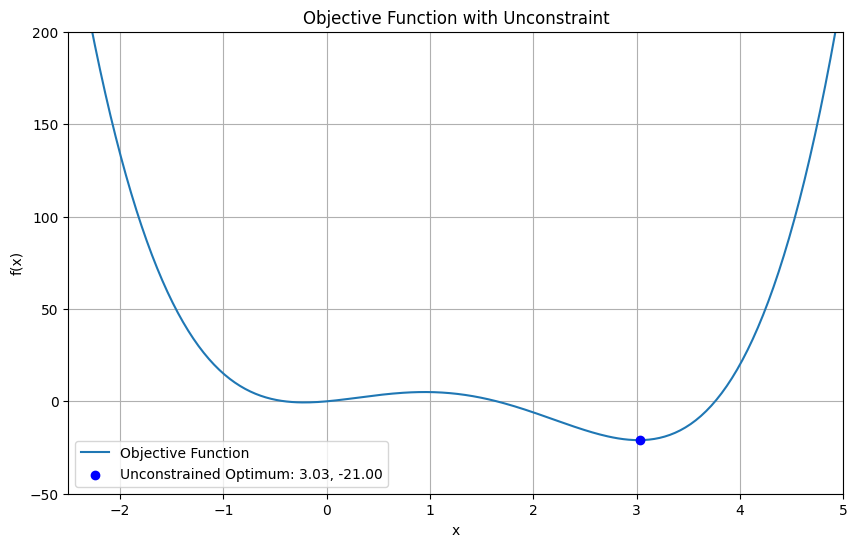

Uncontraind data: 3.0323751244638713 , -21.00464598622979


In [ ]:
# (1) Plotting the results - UnConstrained
x = np.linspace(-5, 5, 400)
y = objective_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Objective Function')
#plt.axvline(x=2, color='r', linestyle='--', label='Constraint: x ≤ 2')
plt.scatter(best_solution, best_score, color='b', zorder=5, label=f'Unconstrained Optimum: {best_solution:.2f}, {best_score:.2f}')
#plt.scatter(best_solution_constrained, best_score_constrained, color='g', zorder=5, label=f'Constrained Optimum: {best_solution_constrained:.2f}, {best_score_constrained:.2f}')
plt.title('Objective Function with Unconstraint')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.axis([-2.5, 5, -50, 200])
plt.show()

#Uncontrained data
print("Uncontraind data:", best_solution,"," , best_score)


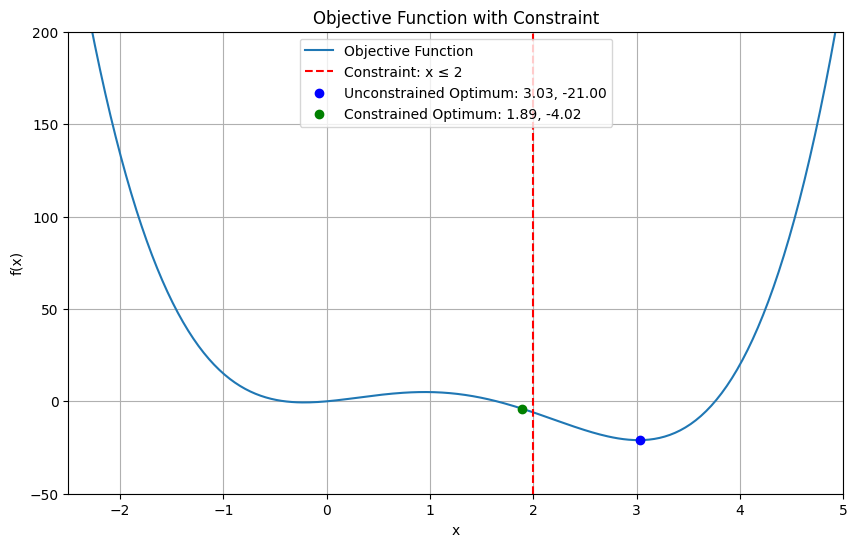

Contraind data: 1.8931645870650984 , -4.0228382178696656


In [ ]:
# (2) Plotting the results - Constrained
x = np.linspace(-5, 5, 400)
y = objective_function(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Objective Function')
plt.axvline(x=2, color='r', linestyle='--', label='Constraint: x ≤ 2')
plt.scatter(best_solution, best_score, color='b', zorder=5, label=f'Unconstrained Optimum: {best_solution:.2f}, {best_score:.2f}')
plt.scatter(best_solution_constrained, best_score_constrained, color='g', zorder=5, label=f'Constrained Optimum: {best_solution_constrained:.2f}, {best_score_constrained:.2f}')
plt.title('Objective Function with Constraint')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.axis([-2.5, 5, -50, 200])
plt.show()

#contrained data
print("Contraind data:", best_solution_constrained ,"," ,best_score_constrained)

## **Task 2: Address the Traveling Salesman Problem (TSP) using the Genetic Algorithm**

### Import the data

In [ ]:
uploaded = files.upload()

Saving Philadelphia.csv to Philadelphia (1).csv
Saving Atlanta.csv to Atlanta (1).csv
Saving New_York.csv to New_York.csv


In [ ]:
from deap import creator, base, tools, algorithms

# Ensure the DEAP library's base classes are not duplicated
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) if not hasattr(creator, 'FitnessMin') else None
creator.create("Individual", list, fitness=creator.FitnessMin) if not hasattr(creator, 'Individual') else None

In [ ]:
atlanta = pd.read_csv("Atlanta.csv", index_col = "Index")
ny = pd.read_csv("New_York.csv", index_col = "Index")
philadelphia = pd.read_csv("Philadelphia.csv", index_col = "Index")

### Visualize the spots

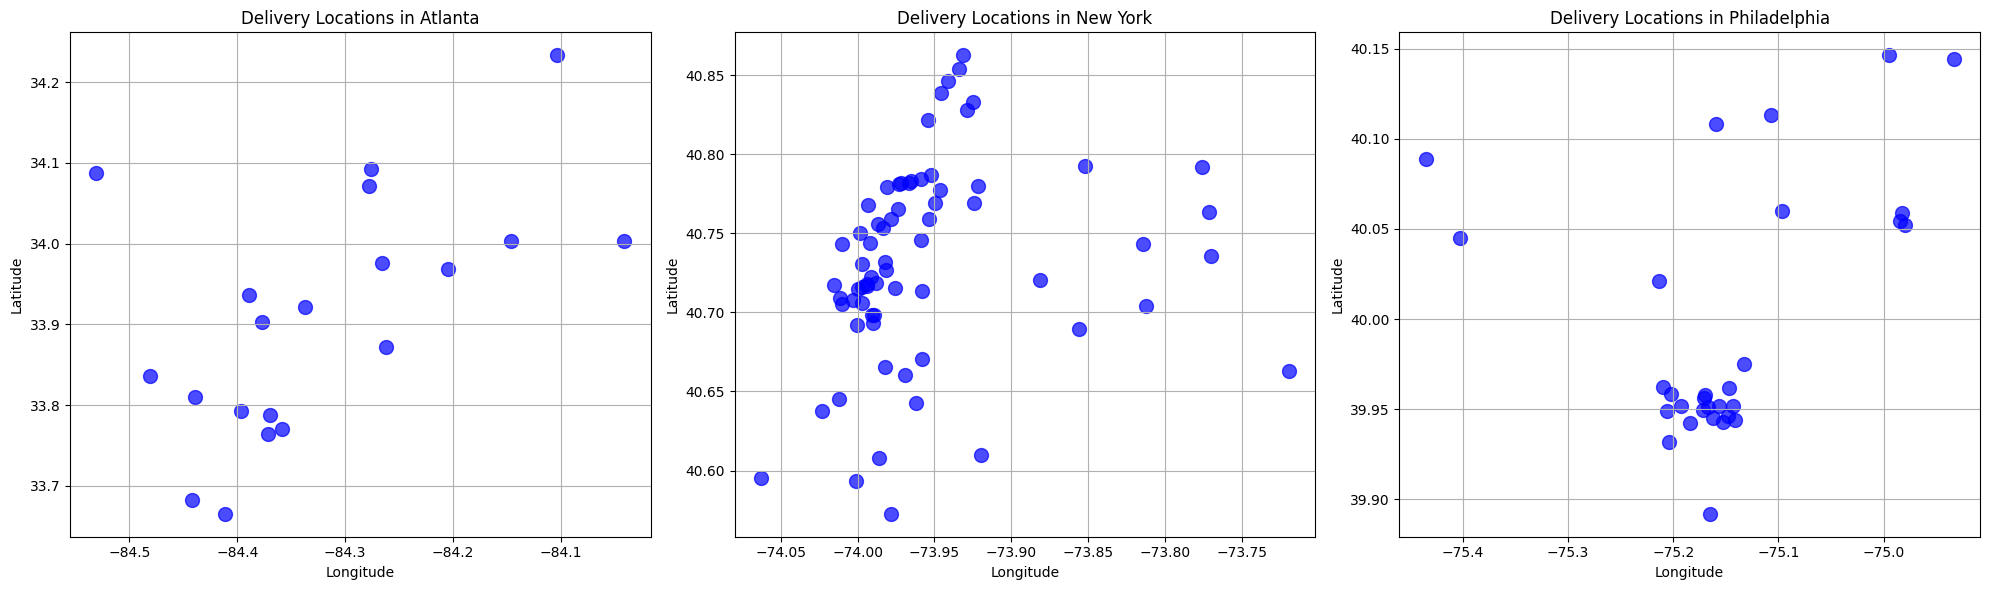

In [ ]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

def plot_spots(cities, titles):
  length = len(cities)
  for i in range(length):
    axes[i].scatter(cities[i]['Longitude (deg)'], cities[i]['Latitude (deg)'], color='blue', s=100, alpha=0.7)
    axes[i].set_title(f'Delivery Locations in {titles[i]}')
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')
    axes[i].grid(True)

plot_spots([atlanta, ny, philadelphia], ['Atlanta', 'New York', 'Philadelphia'])
plt.tight_layout()
plt.show()

### Longitude & Latitude into Matrix (Unit: Km)

In [ ]:
def DistanceAdjacencyMatrix(df):
  # Convert PD DataFrame to a list of tuples representing the latitude and longitude pairs.
  locations = [(row['Latitude (deg)'], row['Longitude (deg)']) for index, row in df.iterrows()]

  num_cities = len(locations)
  distance_matrix = np.zeros((num_cities, num_cities)) # Set shape of distance matrix

  # Compute distances and fill the distance matrix with the package, haversine
  for i in range(num_cities):
    for j in range(num_cities):
      distance_matrix[i, j] = haversine(locations[i], locations[j], unit=Unit.KILOMETERS)
  return distance_matrix

In [ ]:
atlanta_mt = DistanceAdjacencyMatrix(atlanta)
ny_mt = DistanceAdjacencyMatrix(ny)
philadelphia_mt = DistanceAdjacencyMatrix(philadelphia)

### Solution Using the **Genetic Algorithm**

* #### The shortest route generated by GA
* #### The optimal value
* #### Visualization of the optimized route.
* #### Referred to the ChatGPT

In [ ]:
## Genetic Algorithm for solving TSP
# parameters: matrix representing distances between cities,  Number of individuals (tours) in the population 100, Number of generations 500, Probability of mutation 0.02)
def genetic_algorithm_tsp(distance_matrix, population_size=100, num_generations=500, mutation_rate=0.02):
   # creates a toolbox object from the DEAP library,for register various functions, operators
    toolbox = base.Toolbox()
    # stores the number of cities based on the length of the distance_matrix
    num_cities = len(distance_matrix)

    # function that generates random indices representing cities to visit
    def indices_with_start():
        # Randomly permute indices excluding the start point (index 0)
        indices = np.random.permutation(num_cities - 1) + 1
        # Prepend index 0 as the start point
        indices = np.insert(indices, 0, 0)
        return indices


    ## Attribute generator - register various functions in the toolbox
    # indices: lambda function that generates a random permutation of city indices
    toolbox.register("indices", lambda: np.random.permutation(num_cities))
    # individual: creates an individual (tour) by iterating over the city indices
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    # population: creates a population by repeating the process of creating an individual.
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)


    ## Evaluation function
    # takes an individual (tour) as input and calculates its fitness (total distance traveled).
    def evalTSP(individual):
        #  calculates the total distance traveled in the tour. It sums up the distances between consecutive cities in the tour
        dist = sum(distance_matrix[individual[i-1]][individual[i]] for i in range(num_cities))
        # Complete the tour to make it circular
        dist += distance_matrix[individual[-1]][individual[0]]
        return (dist,)
    # registers the evalTSP function as the evaluation function in the DEAP toolbox
    toolbox.register("evaluate", evalTSP)

    ##register genetic operators in the toolbox
    # mate: Ordered crossover (cxOrdered)
    toolbox.register("mate", tools.cxOrdered)
    # mutate: Shuffle mutation (mutShuffleIndexes) with a mutation probability specified by mutation_rate
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=mutation_rate)
    # select: Tournament selection (selTournament) with a tournament size of 3
    toolbox.register("select", tools.selTournament, tournsize=3)

    ## initializes the population
    population = toolbox.population(n=population_size)

    # runs the genetic algorithm using the eaSimple function from DEAP
    result, log = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=num_generations, verbose=False)

    # selects the best individual (tour) from the final population using the selBest function and calculates its fitness (total distance traveled)
    best_individual = tools.selBest(population, 1)[0]
    best_distance = evalTSP(best_individual)[0]
    return best_individual, best_distance

In [ ]:
## Function to plot the cities and the path
# creator: Module to create custom types for individuals and fitnesses
# base: Module providing basic functionalities for creating algorithms
# tools: Module containing various utility functions and operators for algorithms
from deap import creator, base, tools, algorithms

def plot_tsp_solution(city_df, tour, title):
    plt.figure(figsize=(10, 7))  # initializes figure with a size for plotting
    # list of tuples containing coordinates
    points = [(city_df.iloc[i]['Latitude (deg)'], city_df.iloc[i]['Longitude (deg)']) for i in tour]
    points.append(points[0])  # close the loop
    xs, ys = zip(*points)     # unpacks the coordinates of cities into list xs and ys
    plt.plot(xs, ys, 'o-')    # plots the tour on figure
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.grid(True)
    plt.show()

In [ ]:

# Executing the genentic algorithm for Solving TSP for each city
atlanta_tour, atlanta_distance = genetic_algorithm_tsp(atlanta_mt)
ny_tour, ny_distance = genetic_algorithm_tsp(ny_mt)
philadelphia_tour, philadelphia_distance = genetic_algorithm_tsp(philadelphia_mt)



#### Display results and plots

In [ ]:
## (1) Adjust Atlanta tour sequence
# Extract the first city (city 0) and the last city, and include only non-zero cities except the previous two
atlanta_tour = atlanta_tour[:1] + [city for city in atlanta_tour[1:-1] if city != 0] + atlanta_tour[-1:]

# checks whether the starting point of the tour is City 0 or not
if atlanta_tour[0] != 0:
    atlanta_tour.insert(0, 0)  # appends City 0 at the beginning of the tour
# checks whether the ending point of the tour is City 0 or not
if atlanta_tour[-1] != 0:
    atlanta_tour.append(0)  # appends City 0 at the end of the tour

Best tour in Atlanta:  [0, 12, 10, 4, 19, 5, 3, 18, 14, 7, 15, 9, 13, 17, 11, 8, 6, 1, 2, 16, 0]
Best distance in Atlanta: 231.28 km


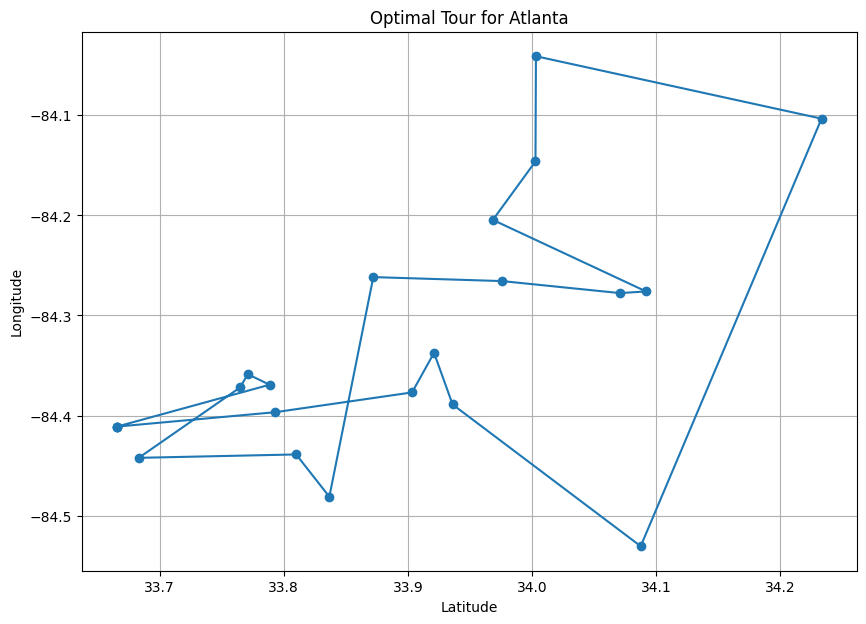

In [ ]:
# show the result of Atlanta
print("Best tour in Atlanta: ", atlanta_tour)
print("Best distance in Atlanta: {:.2f} km".format(atlanta_distance))
plot_tsp_solution(atlanta, atlanta_tour, "Optimal Tour for Atlanta")

In [ ]:
## (2) Adjust New York tour sequence
# Extract the first city (city 0) and the last city, and include only non-zero cities except the previous two
ny_tour = ny_tour[:1] + [city for city in ny_tour[1:-1] if city != 0] + ny_tour[-1:]

# checks whether the starting point of the tour is City 0 or not
if ny_tour[0] != 0:
    ny_tour.insert(0, 0)  # appends City 0 at the beginning of the tour

# # checks whether the ending point of the tour is City 0 or not
if ny_tour[-1] != 0:
    ny_tour.append(0)  # appends City 0 at the end of the tour

Best tour in New York:  [0, 4, 65, 25, 33, 6, 66, 63, 5, 22, 48, 59, 24, 29, 40, 37, 10, 54, 45, 42, 21, 51, 32, 56, 9, 17, 13, 30, 43, 49, 27, 1, 26, 16, 35, 15, 60, 11, 55, 28, 20, 62, 58, 8, 57, 14, 7, 67, 52, 36, 61, 38, 50, 34, 44, 64, 47, 19, 53, 18, 12, 3, 46, 23, 2, 41, 31, 39, 0]
Best distance in New York: 203.15 km


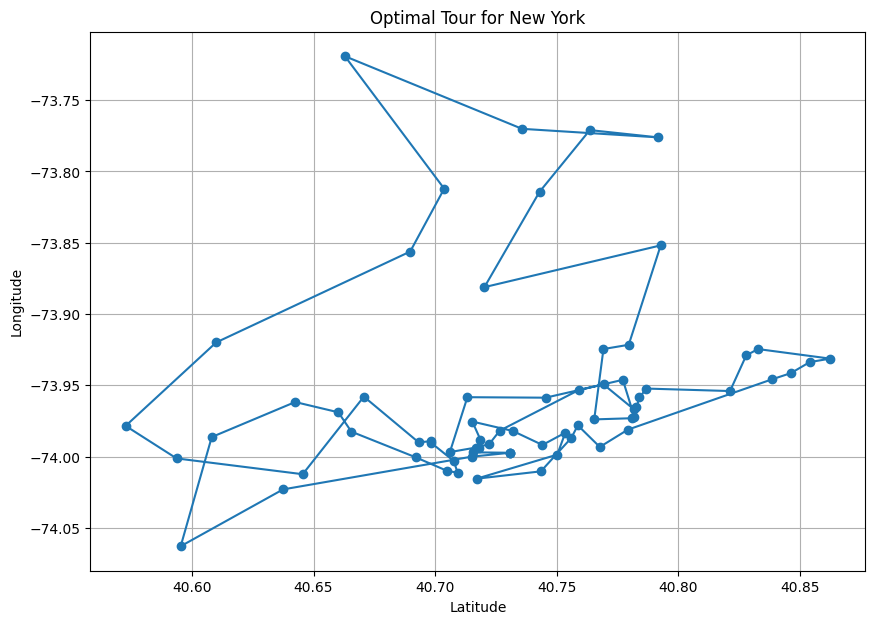

In [ ]:
# show the result of New York

print("Best tour in New York: ", ny_tour)
print("Best distance in New York: {:.2f} km".format(ny_distance))
plot_tsp_solution(ny, ny_tour, "Optimal Tour for New York")

In [ ]:
## (3) Adjust philadelphia tour sequence
# Extract the first city (city 0) and the last city, and include only non-zero cities except the previous two
philadelphia_tour = philadelphia_tour[:1] + [city for city in philadelphia_tour[1:-1] if city != 0] + philadelphia_tour[-1:]

# checks whether the starting point of the tour is City 0 or not
if philadelphia_tour[0] != 0:
    philadelphia_tour.insert(0, 0)  # appends City 0 at the beginning of the tour
# checks whether the ending point of the tour is City 0 or not
if philadelphia_tour[-1] != 0:
    philadelphia_tour.append(0)  # appends City 0 at the end of the tour

Best tour in Philadelphia:  [0, 4, 13, 15, 28, 27, 1, 29, 5, 14, 16, 9, 2, 6, 26, 7, 11, 22, 20, 8, 12, 24, 19, 23, 18, 21, 10, 25, 3, 17, 0]
Best distance in Philadelphia: 155.72 km


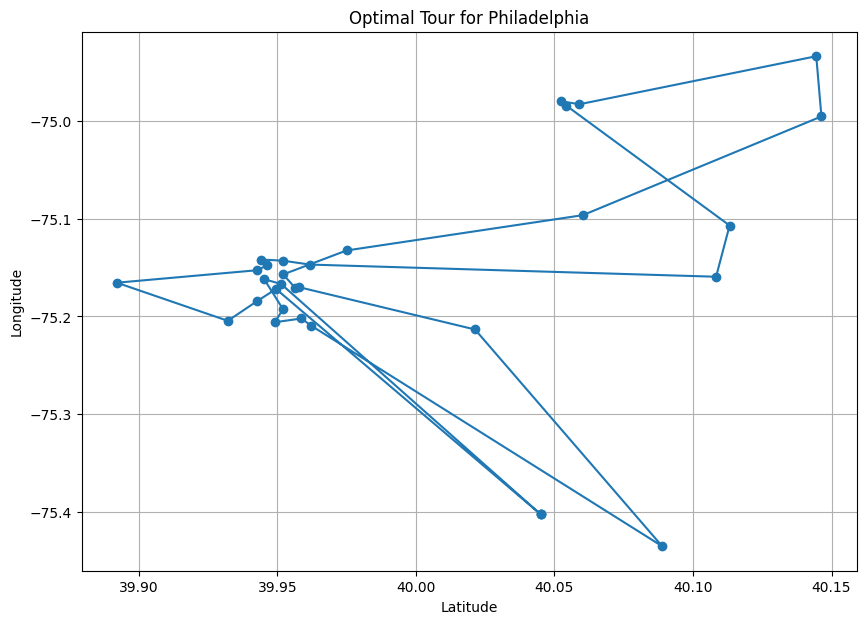

In [ ]:
# show the result of Philadelphia

print("Best tour in Philadelphia: ", philadelphia_tour)
print("Best distance in Philadelphia: {:.2f} km".format(philadelphia_distance))
plot_tsp_solution(philadelphia, philadelphia_tour, "Optimal Tour for Philadelphia")

Create a plot of convergence history showing the optimum value generated by the genetic algorithm is converged as the number of iterations increases.

In [ ]:
## Genetic Algorithm for solving TSP
# parameters: matrix representing distances between cities,  Number of individuals (tours) in the population 100, Number of generations 500, Probability of mutation 0.02)
def genetic_algorithm_tsp(distance_matrix, population_size=100, num_generations=500, mutation_rate=0.02):
    toolbox = base.Toolbox()  # initializes a DEAP toolbox object
    num_cities = len(distance_matrix)

    # function that generates random indices representing cities to visit
    def indices_with_start():
        # Randomly permute indices excluding the start point (index 0)
        indices = np.random.permutation(num_cities - 1) + 1
        # Prepend index 0 as the start point
        indices = np.insert(indices, 0, 0)
        return indices
    # Attribute generator
    toolbox.register("indices", np.random.permutation, num_cities)
    # Structure initializers
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    # creates a population
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    ## Evaluation function
    # takes an individual (tour) as input and calculates its fitness (total distance traveled).
    def evalTSP(individual):
        #  calculates the total distance traveled in the tour. It sums up the distances between consecutive cities in the tour
        dist = sum(distance_matrix[individual[i-1]][individual[i]] for i in range(num_cities))
        # Complete the tour to make it circular
        dist += distance_matrix[individual[-1]][individual[0]]
        return (dist,)
    # registers the evalTSP function as the evaluation function in the DEAP toolbox
    toolbox.register("evaluate", evalTSP)

    ## register genetic operators in the toolbox
    # Genetic operators for crossover
    toolbox.register("mate", tools.cxOrdered)
    # Shuffle mutation (mutShuffleIndexes) with a mutation probability specified by mutation_rate
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=mutation_rate)
    # select: Tournament selection (selTournament) with a tournament size of 3
    toolbox.register("select", tools.selTournament, tournsize=3)

    # Create initial population
    population = toolbox.population(n=population_size)
    # collect statistics during the evolution, the minimum fitness value
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)


    # Using eaSimple() from DEAP to execute the evolutionary algorithm
    result, log = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=num_generations, stats=stats, verbose=False)

    # Using selBest() to select best individual (tour) from the final population
    best_individual = tools.selBest(population, 1)[0]
    best_distance = evalTSP(best_individual)[0]  # total distance of the best tour

    # 'log' containing collected statistics during the evolution
    return best_individual, best_distance, log

In [ ]:
# Solve TSP for each city using genetic_algorithm_tsp()
atlanta_tour, atlanta_distance, atlanta_log = genetic_algorithm_tsp(atlanta_mt)
ny_tour, ny_distance, ny_log = genetic_algorithm_tsp(ny_mt)
philadelphia_tour, philadelphia_distance, philadelphia_log = genetic_algorithm_tsp(philadelphia_mt)


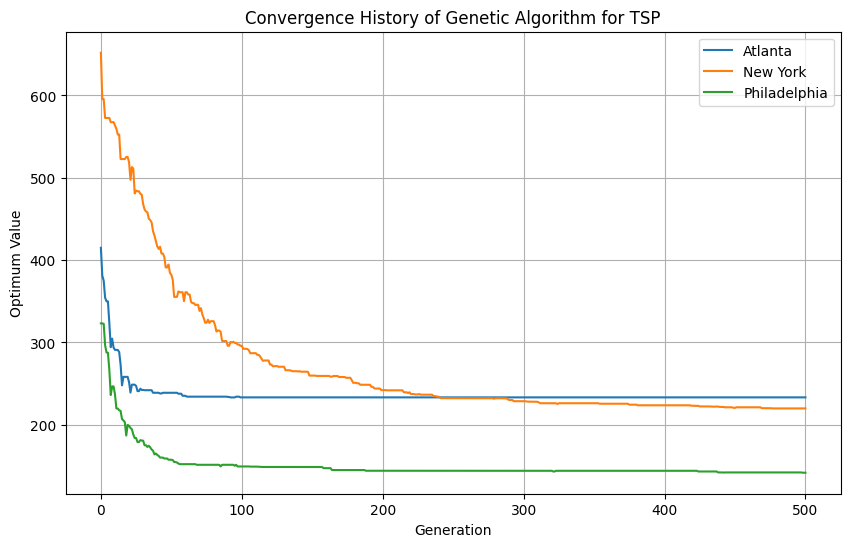

In [ ]:
## Plot convergence history for each city
# By Plotting minimum fitness values (shortest distances)
plt.figure(figsize=(10, 6))
plt.plot(atlanta_log.select('min'), label='Atlanta')
plt.plot(ny_log.select('min'), label='New York')
plt.plot(philadelphia_log.select('min'), label='Philadelphia')
plt.title('Convergence History of Genetic Algorithm for TSP')
plt.xlabel('Generation')
plt.ylabel('Optimum Value')
plt.legend()
plt.grid(True)
plt.show()


### Greedy algorithm

In [ ]:
#define greedy algorithm
def greedy_path(df):
    num = 0 # start point at 0
    smallest_list = []
    tour_city = [num]
    count = len(df)
    x = list(range(len(df)))
    while count > 1:
        min_distance = float('inf') # make it smallest value to find minium distance
        next_city = -1
        for i in x:
            if i != num and df[num, i] < min_distance: # compare which distance is very small and filter the point we have never went
                min_distance = df[num, i]
                next_city = i
        smallest_list.append(min_distance)
        tour_city.append(next_city)
        x.remove(num)
        num = next_city # go to the other city that is smallest distance
        count -= 1
    smallest_list.append(df[tour_city[-1], tour_city[0]]) # add end point to start point
    tour_city.append(0) # add strat point in last
    return sum(smallest_list), tour_city

In [ ]:
import matplotlib.pyplot as plt

# make the city to city graph

def show_graph(latitude, longitude, tour_city):
    fig, ax = plt.subplots(figsize=(10, 6))
    for i in range(len(tour_city)-1):
        city1_index = tour_city[i]
        city2_index = tour_city[i+1]
        plt.arrow(longitude[city1_index], latitude[city1_index],
                  longitude[city2_index] - longitude[city1_index],
                  latitude[city2_index] - latitude[city1_index],
                  head_width=0.001, head_length=0.001, fc='blue', ec='blue') # make the arrow line that go to start point to end point
    plt.scatter(longitude, latitude, color='red')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Tour Route')
    plt.grid(True)
    plt.show()



In [ ]:
at_total_length , at_tour_city = greedy_path(atlanta_mt) #run it
print(at_total_length , at_tour_city)

231.98271271866298 [0, 6, 1, 2, 16, 12, 8, 11, 10, 19, 4, 17, 13, 7, 14, 18, 9, 15, 3, 5, 0]


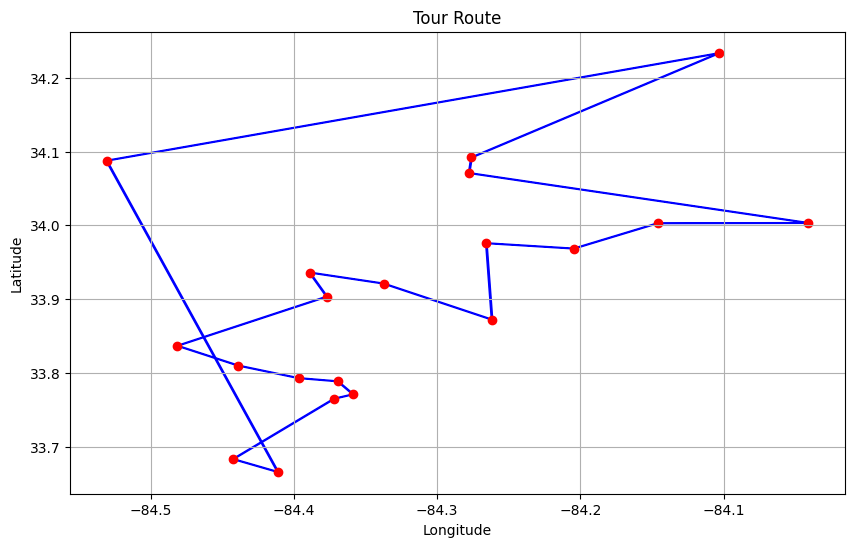

In [ ]:
at_total_length , at_tour_city = greedy_path(atlanta_mt)
show_graph(atlanta['Latitude (deg)'], atlanta['Longitude (deg)'], at_tour_city)# run it

In [ ]:
ny_total_length , ny_tour_city = greedy_path(ny_mt) # run it
print(ny_total_length , ny_tour_city)

202.55084076785337 [0, 11, 41, 31, 55, 39, 4, 59, 28, 24, 29, 40, 5, 22, 48, 18, 53, 12, 46, 3, 19, 47, 1, 64, 44, 26, 16, 8, 57, 14, 7, 35, 58, 15, 62, 23, 60, 2, 20, 37, 66, 63, 6, 10, 65, 33, 54, 45, 42, 21, 30, 51, 13, 56, 17, 9, 43, 49, 27, 67, 34, 50, 38, 61, 36, 52, 32, 25, 0]


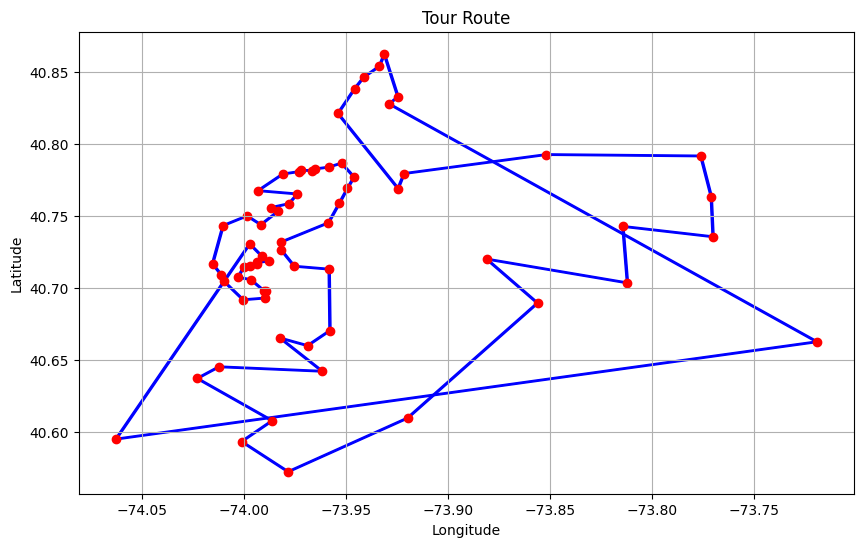

In [ ]:
ny_total_length, ny_tour_city = greedy_path(ny_mt)
show_graph(ny['Latitude (deg)'], ny['Longitude (deg)'], ny_tour_city)# run it

In [ ]:
ph_total_length , ph_tour_city = greedy_path(philadelphia_mt) # run it
print(ph_total_length , ph_tour_city)

157.12292657716955 [0, 23, 19, 18, 21, 25, 10, 15, 13, 4, 17, 12, 24, 8, 3, 27, 1, 29, 5, 14, 20, 28, 22, 9, 16, 11, 7, 26, 2, 6, 0]


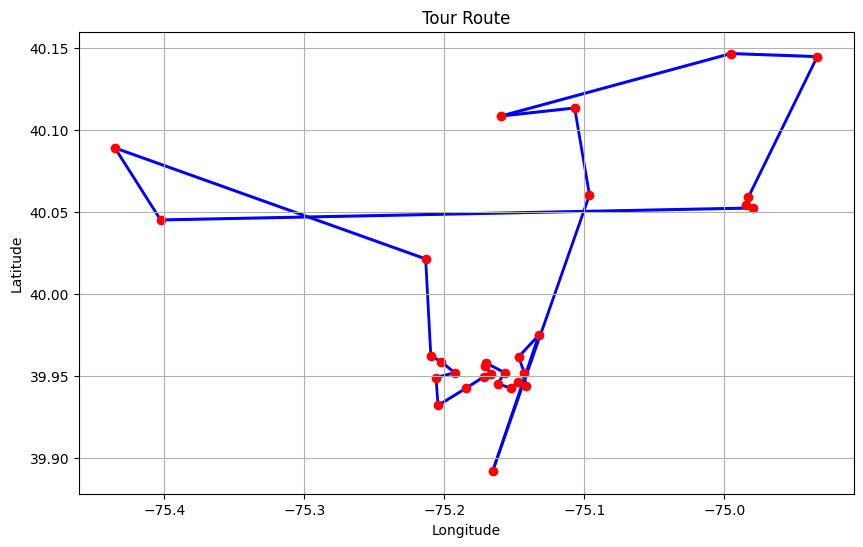

In [ ]:
ph_total_length , ph_tour_city = greedy_path(philadelphia_mt)
show_graph(philadelphia['Latitude (deg)'], philadelphia['Longitude (deg)'], ph_tour_city) # run it

#### Prepare the Data
* ##### Importing Data
* ##### Visulizing the Location in Simple Plot
* ##### Longitude and Latitude into matrix

## **Additional Application: Black Pink World Tour Course Re-designing**

In [ ]:
# Importing the file
uploaded = files.upload()

Saving blackpink_world_tour.csv to blackpink_world_tour.csv


In [ ]:
blackPink = pd.read_csv("blackpink_world_tour.csv")

In [ ]:
# Check the DataFrame
blackPink = blackPink.rename(columns={'X': 'Longitude (deg)', 'Y': 'Latitude (deg)'})
blackPink.drop('Unnamed: 3', axis=1, inplace=True)
blackPink.head()

,Longitude (deg),Latitude (deg),Name
0,127.127364,37.519150,올림픽공원 KSPO DOME
1,-96.810255,32.790391,아메리칸 에어라인스 센터
2,-95.362217,29.750921,도요타 센터
3,-84.396324,33.757289,스테이트팜 아레나
4,-79.872250,43.259028,FirstOntario Centre


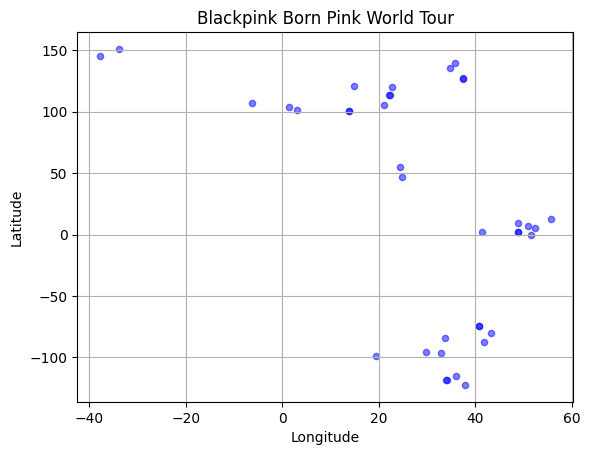

In [ ]:
# Plot the concerts locations
plt.scatter(blackPink['Latitude (deg)'], blackPink['Longitude (deg)'], color='blue', s=20, alpha=0.5) #By making tranparency, we can visually see the overlapped cities.
plt.title('Blackpink Born Pink World Tour')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

According to the plot, we can see that there are overlapped data(stronger color gradient).
This indicates that some of them are so close.
So We decided to regard this overlapping as a encore concert for the cities who showed ethusiastic love for BP.

In [ ]:
# Calcuate the distances between the spots and make the matrix of calculations using harvesine formula
blackPink_mt = DistanceAdjacencyMatrix(blackPink)


#### Visualize original path on world map

In [ ]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

<ipython-input-10-e979e73f0320>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [ ]:
# Define the function that visualize the places and route on world map
def plot_worldmap(city_df, tour_order, title):
    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(20, 10))

    # Plot the world map
    world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

    # Plot the Blackpink tour locations
    points = [(city_df.iloc[i]['Longitude (deg)'], city_df.iloc[i]['Latitude (deg)']) for i in tour_order]
    points.append(points[0])  # close the loop
    xs, ys = zip(*points)
    ax.plot(xs, ys, 'o-', color='red', markersize=10)

    # Set the title and labels
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)

    # Show the plot
    plt.show()

In [ ]:
# Define the function that calculate the original tour distances
def calculate_tour_length(individual, distances):
    tour_length = 0
    for i in range(len(individual)):
        tour_length += distances[individual[i]][individual[(i + 1) % len(individual)]]
    return tour_length

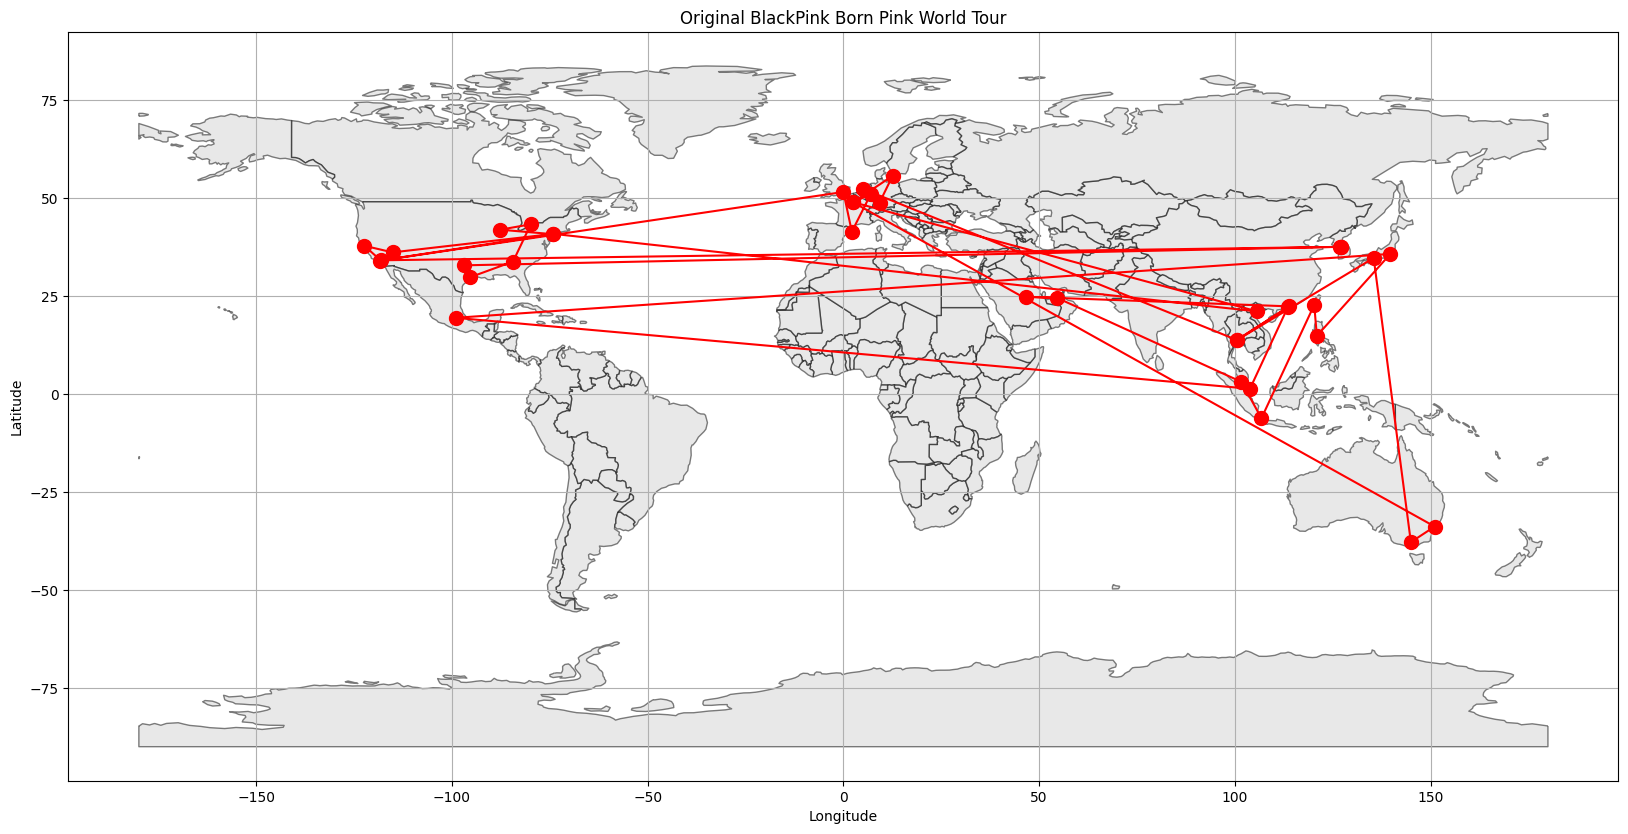

Original tour: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Original tour length: 164514.2244747617 km


In [ ]:
original_tour = [x for x in range(len(blackPink_mt))] #[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
original_tour_lenght= calculate_tour_length(original_tour, blackPink_mt)

plot_worldmap(blackPink, original_tour, "Original BlackPink Born Pink World Tour")

print(f"Original tour: {original_tour}")
print(f"Original tour length: {original_tour_lenght- blackPink_mt[len(blackPink_mt)-1][0]} km")

#### Optimal Tour without Constraint for BlackPink

In [ ]:
blackPink_tour, blackPink_distance, a = genetic_algorithm_tsp(blackPink_mt) #Using the function defined for UPS problem

Best tour w/o constraints:  [28, 21, 32, 27, 19, 25, 20, 22, 29, 30, 35, 1, 6, 33, 8, 14, 12, 10, 11, 31, 4, 5, 34, 36, 7, 24, 2, 3, 9, 13, 17, 18, 15, 26, 16, 37, 0, 23]
Best distance w/o constraints: 78936.7861070226 km
Reduced Travel Distances:  84790.01767278434 km


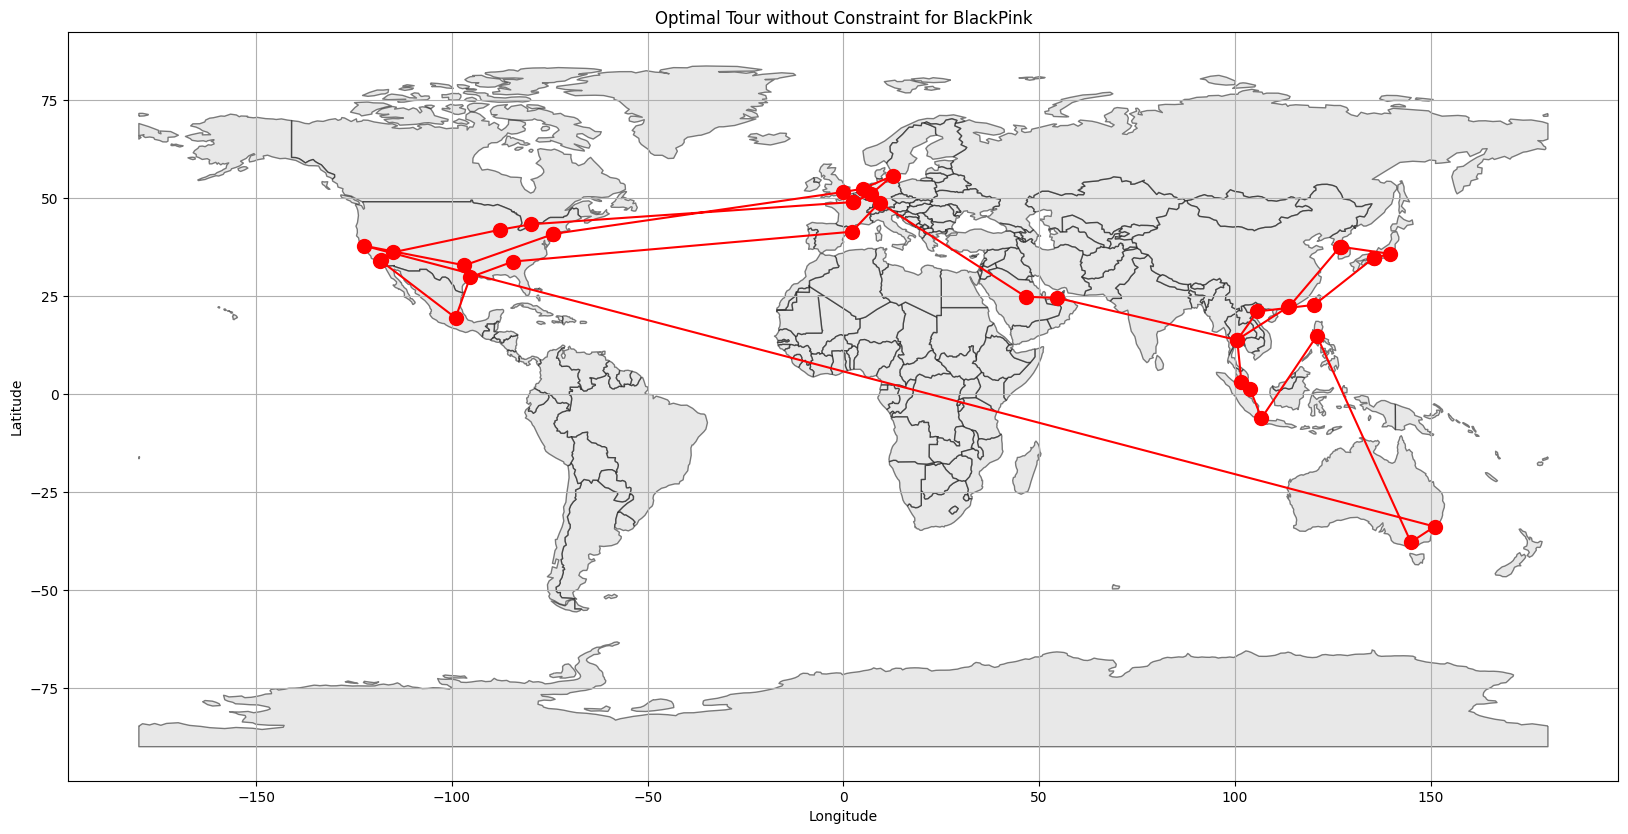

In [ ]:
print("Best tour w/o constraints: ", blackPink_tour)
print(f"Best distance w/o constraints: {blackPink_distance - blackPink_mt[blackPink_tour[-1]][blackPink_tour[0]]} km")
print("Reduced Travel Distances: ", (original_tour_lenght - blackPink_distance - blackPink_mt[blackPink_tour[-1]][blackPink_tour[0]]), "km")

plot_worldmap(blackPink, blackPink_tour, "Optimal Tour without Constraint for BlackPink")

#### Optimal Tour with Constraints for BlackPink
##### The Constraints are:


1.   ##### The first place and the last place should be same with the original data.
  * Suppose the path is 'Manhattan -> Rhode Island -> NYC -> Boston -> New Jersy.'
  * Rhode island, nyc, boston can change the order between them.
  * However, the Manhattan and New Jersy should stay still.
  * They can always be the starting point and the last destination

2.   ##### If the distance A and B is less than 100 km, we are not going to let them to be connected although that makes it longer ways to go.

##### Thus, the genetic_algorithm_tsp function now takes three additional parameters: **start_index, end_index, and min_distance**.

##### The evalTSP function has been modified to ensure that the distance between any **two consecutive cities** is at least **min_distance**.

In [ ]:
def genetic_algorithm_tsp_for_concert(distance_matrix, start_index, end_index, min_distance=50, population_size=100, num_generations=800, mutation_rate=0.02):
    toolbox = base.Toolbox()
    num_cities = len(distance_matrix)

    # Attribute generator
    toolbox.register("indices", np.random.permutation, num_cities)

    # Structure initializers
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    def evalTSP(individual):
        distance = 0
        # Ensure the route starts at index 0 and ends at index 37
        if individual[0] != 0 or individual[-1] != 37:
            return (float('inf'),)
        for i in range(len(individual)):
            if i == 0:
                distance += distance_matrix[individual[i]][0]
            elif i == len(individual) - 1:
                distance += distance_matrix[individual[i]][37]
            else:
                if distance_matrix[individual[i-1]][individual[i]] >= min_distance:
                    distance += distance_matrix[individual[i-1]][individual[i]]
                else:
                    return (float('inf'),)
        return (distance,)

    # Evaluation function
    toolbox.register("evaluate", evalTSP)

    # Genetic operators
    toolbox.register("mate", tools.cxOrdered)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=mutation_rate)
    toolbox.register("select", tools.selTournament, tournsize=3)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min) # the function that remembers the minimum value

    # Run the genetic algorithm
    population = toolbox.population(n=population_size)
    result, log = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=num_generations, stats=stats, verbose=False)

    # Find the best individual and its distance
    best_individual = tools.selBest(population, 1)[0]
    best_distance = evalTSP(best_individual)[0]

    # Ensure the best individual starts at 0 and ends at 37
    if best_individual[0] != 0 or best_individual[-1] != 37:
        raise ValueError("The best individual does not start at 0 and end at 37.")

    return best_individual, best_distance, log

In [ ]:
start_index = 0
end_index = len(blackPink_mt) - 1
best_BP_tour, best_BP_distance, best_BP_log = genetic_algorithm_tsp_for_concert(blackPink_mt, start_index, end_index, min_distance=500)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Best tour w/ constraints:  [0, 28, 16, 21, 26, 32, 27, 25, 20, 19, 15, 10, 12, 13, 8, 9, 11, 17, 18, 14, 22, 29, 30, 23, 7, 35, 36, 1, 24, 2, 34, 5, 3, 6, 4, 33, 31, 37]
Best distance w/ constraints: 88368.89297369943 km
Reduced Travel Distances:  76122.24828013696 km


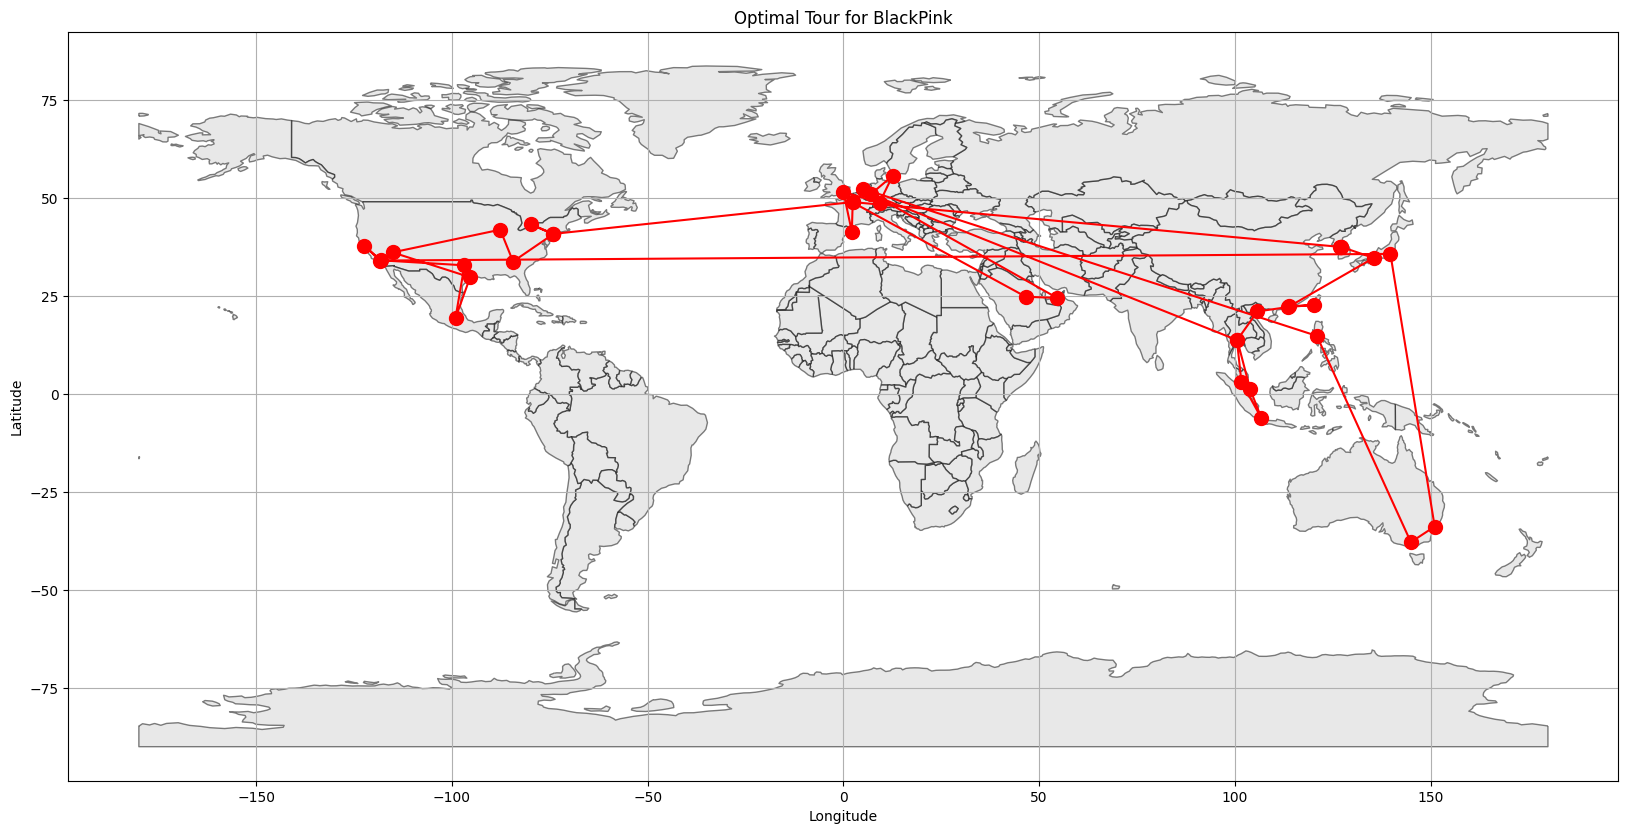

In [ ]:
print("Best tour w/ constraints: ", best_BP_tour)

# Because the function we difined is based on the algorithm for UPS problem that adds the distance of coming back to the first place,
# here we exclude that distance between the first and the last place.

print(f"Best distance w/ constraints: {best_BP_distance - blackPink_mt[len(blackPink_mt)-1][0]} km")
print("Reduced Travel Distances: ", (original_tour_lenght - best_BP_distance - blackPink_mt[len(blackPink_mt)-1][0]), "km")

# Call the plot_tsp_solution function
plot_worldmap(blackPink, best_BP_tour, "Optimal Tour for BlackPink")

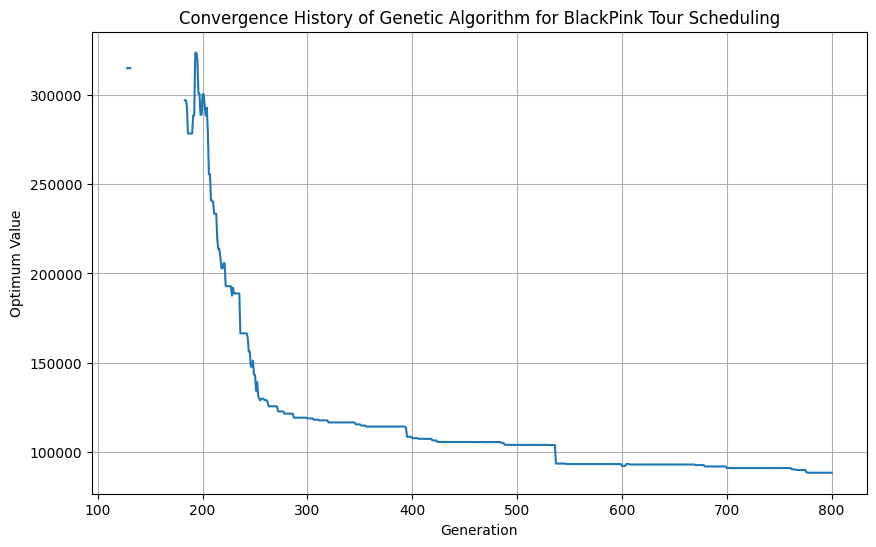

In [ ]:
# Plot convergence history
plt.figure(figsize=(10, 6))
plt.plot(best_BP_log.select('min'))
plt.title('Convergence History of Genetic Algorithm for BlackPink Tour Scheduling')
plt.xlabel('Generation')
plt.ylabel('Optimum Value')
plt.grid(True)
plt.show()

In [ ]:
rescheduled_df = pd.DataFrame(blackPink, best_BP_tour)
rescheduled_df

,Longitude (deg),Latitude (deg),Name
0,127.127364,37.519150,올림픽공원 KSPO DOME
28,135.476143,34.669280,교세라 돔 오사카
16,113.943288,22.321343,아시아월드-엑스포
21,120.294452,22.703116,가오슝 국가체육장
26,113.556991,22.143313,"Galaxy Arena, Galaxy International Convention ..."
32,105.763919,21.020484,My Dinh National Stadium
27,100.621239,13.755570,라차망칼라 국립경기장
25,103.874843,1.304013,National Stadium
20,106.801773,-6.218649,겔로라 붕 카르노 경기장
19,101.691276,3.054624,부킷 자릴 국립경기장


In [ ]:
rescheduled_df.to_csv("rescheduled.csv")

# **Reference**
- Anthropic. (2023). Claude. Claude.ai. https://claude.ai/chats
- Kim, J.H. (2024). Genetic Algorithm. Lecture Resources on Algorithm Class (April 26). Retrieved from https://lms.handong.edu/courses/15331/external_tools/3
- OpenAI. (2024). ChatGPT (April 26 version) [Large language model]. https://chat.openai.com
